# Image Recognition using Convolutional Neural Networks

## Introduction

Problem: Here, our problem is quite simple. Is the image a dog or a cat? However, our neural network isn't. It utilizes convolution methods to be able to predict specific features of an image according to what it learns on a training set. For example, we might say that we can tell the difference by looking for whiskers on a cat or long snout on a dog. But a convolutional neural network looks for many other features based on what we give it in a training set. 

Dataset: We have 4000 images of dogs and 4000 images of cats for the training set. For the test set, we have 1000 images of dogs and 1000 images of cats.

Solution: Utilize Convolutional Neural Networks to develop a image feature dectector which will predict if an image contains a dog or a cat.

## Data Visualization

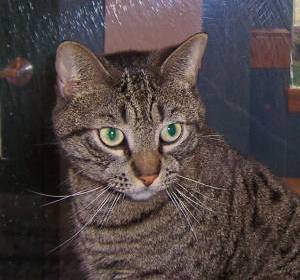

In [12]:
# Import package to display image
from IPython.display import Image
Image(filename='dataset/training_set/cats/cat.1.jpg')

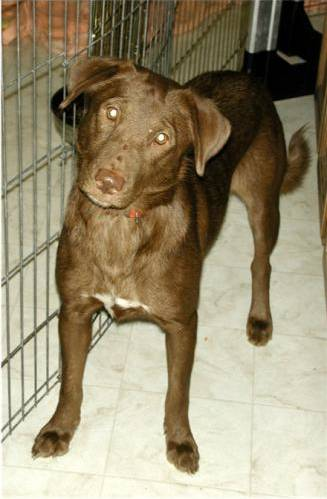

In [9]:
Image(filename='dataset/training_set/dogs/dog.1.jpg')

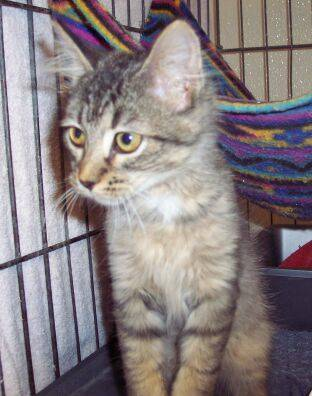

In [10]:
Image(filename='dataset/training_set/cats/cat.2.jpg')

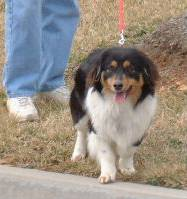

In [11]:
Image(filename='dataset/training_set/dogs/dog.2.jpg')

## Building the Convolutional Neural Network

Since our network is sequence of layers, we use the Sequential model from Keras along with the relevant packages for convolutional neural network layering.

In [13]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

First, we initialize our Neural Network.

In [14]:
# Initializing the Convolutional Neural Network
classifier = Sequential()

Now we set the parameters for input shape and set the activation function to rectifer. We use 32 features for our 2D array and set our array to be 3x3. We will convert all of our images to be 64x64 into a 3D array (Since it is in color).

In [15]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Now we use pooling to reduce the size of the feature map taken from the convolution stage. (Divide by 2)

In [16]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

We add a second layer for a deeper neural network.

In [17]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Now we flatten our 2D pooled array into a vector.

In [18]:
# Step 3 - Flattening
classifier.add(Flatten())

Now we connect all of the layers. We use a rectifer function then finally a sigmoid function to get probabilities for the image containing a dog or a cat.

In [19]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Finally, we compile our neural network. To compile our neural network, we use an 'Adam' optimizer, an excellent algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments. We use a log loss function, binary crossentropy. since it works well with our sigmoid function. Our metrics will be accuracy since that is what we are most concerned about for our model.

In [20]:
# Compiling the convoluted neural network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the Convolutional Neural Network to the Images

In [21]:
# Taken from Keras Documentation
# https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


We use 8000 steps for the 8000 images in our training set for each epoch. We choose 2000 validation steps for the 2000 images in our test set.

In [23]:
# We use 8000 steps for 8000 images in training set
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/5
8000/8000 [==============================] - 1668s - loss: 0.0120 - acc: 0.9964 - val_loss: 1.3349 - val_acc: 0.8224
Epoch 2/5
8000/8000 [==============================] - 1644s - loss: 0.0120 - acc: 0.9963 - val_loss: 1.3681 - val_acc: 0.8275
Epoch 3/5
8000/8000 [==============================] - 1706s - loss: 0.0122 - acc: 0.9963 - val_loss: 1.3606 - val_acc: 0.8200
Epoch 4/5
8000/8000 [==============================] - 1687s - loss: 0.0106 - acc: 0.9968 - val_loss: 1.3726 - val_acc: 0.8185
Epoch 5/5
8000/8000 [==============================] - 1660s - loss: 0.0108 - acc: 0.9967 - val_loss: 1.3687 - val_acc: 0.8188


## Making New Predictions

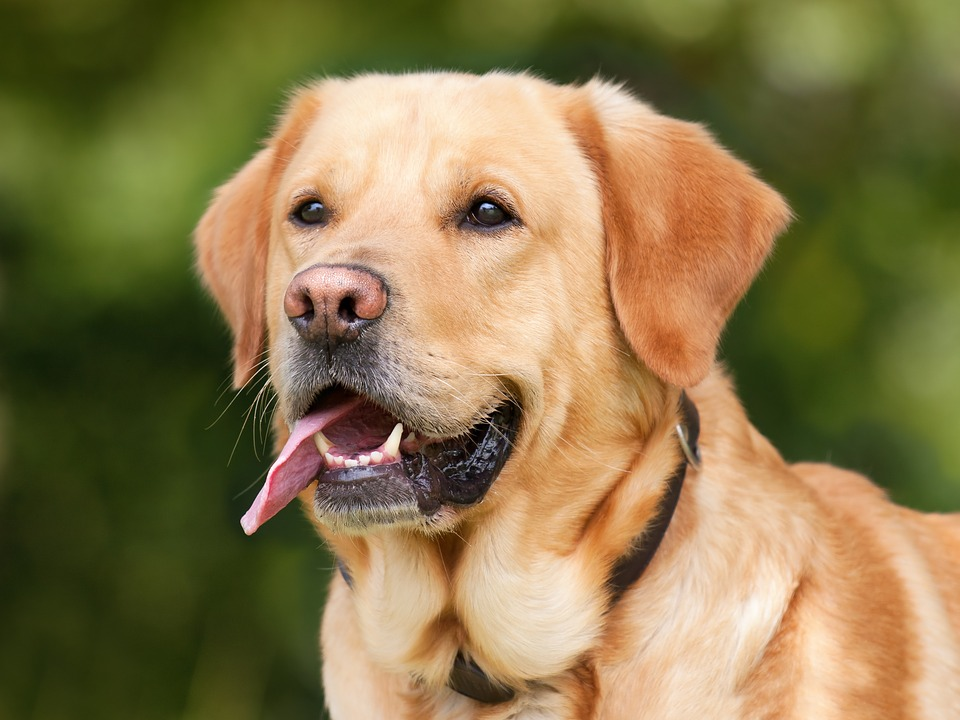

In [34]:
# Importing image
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

Image(filename='dataset/single_prediction/cat_or_dog_1.jpg')

In [35]:
# Making prediction
prediction

'dog'

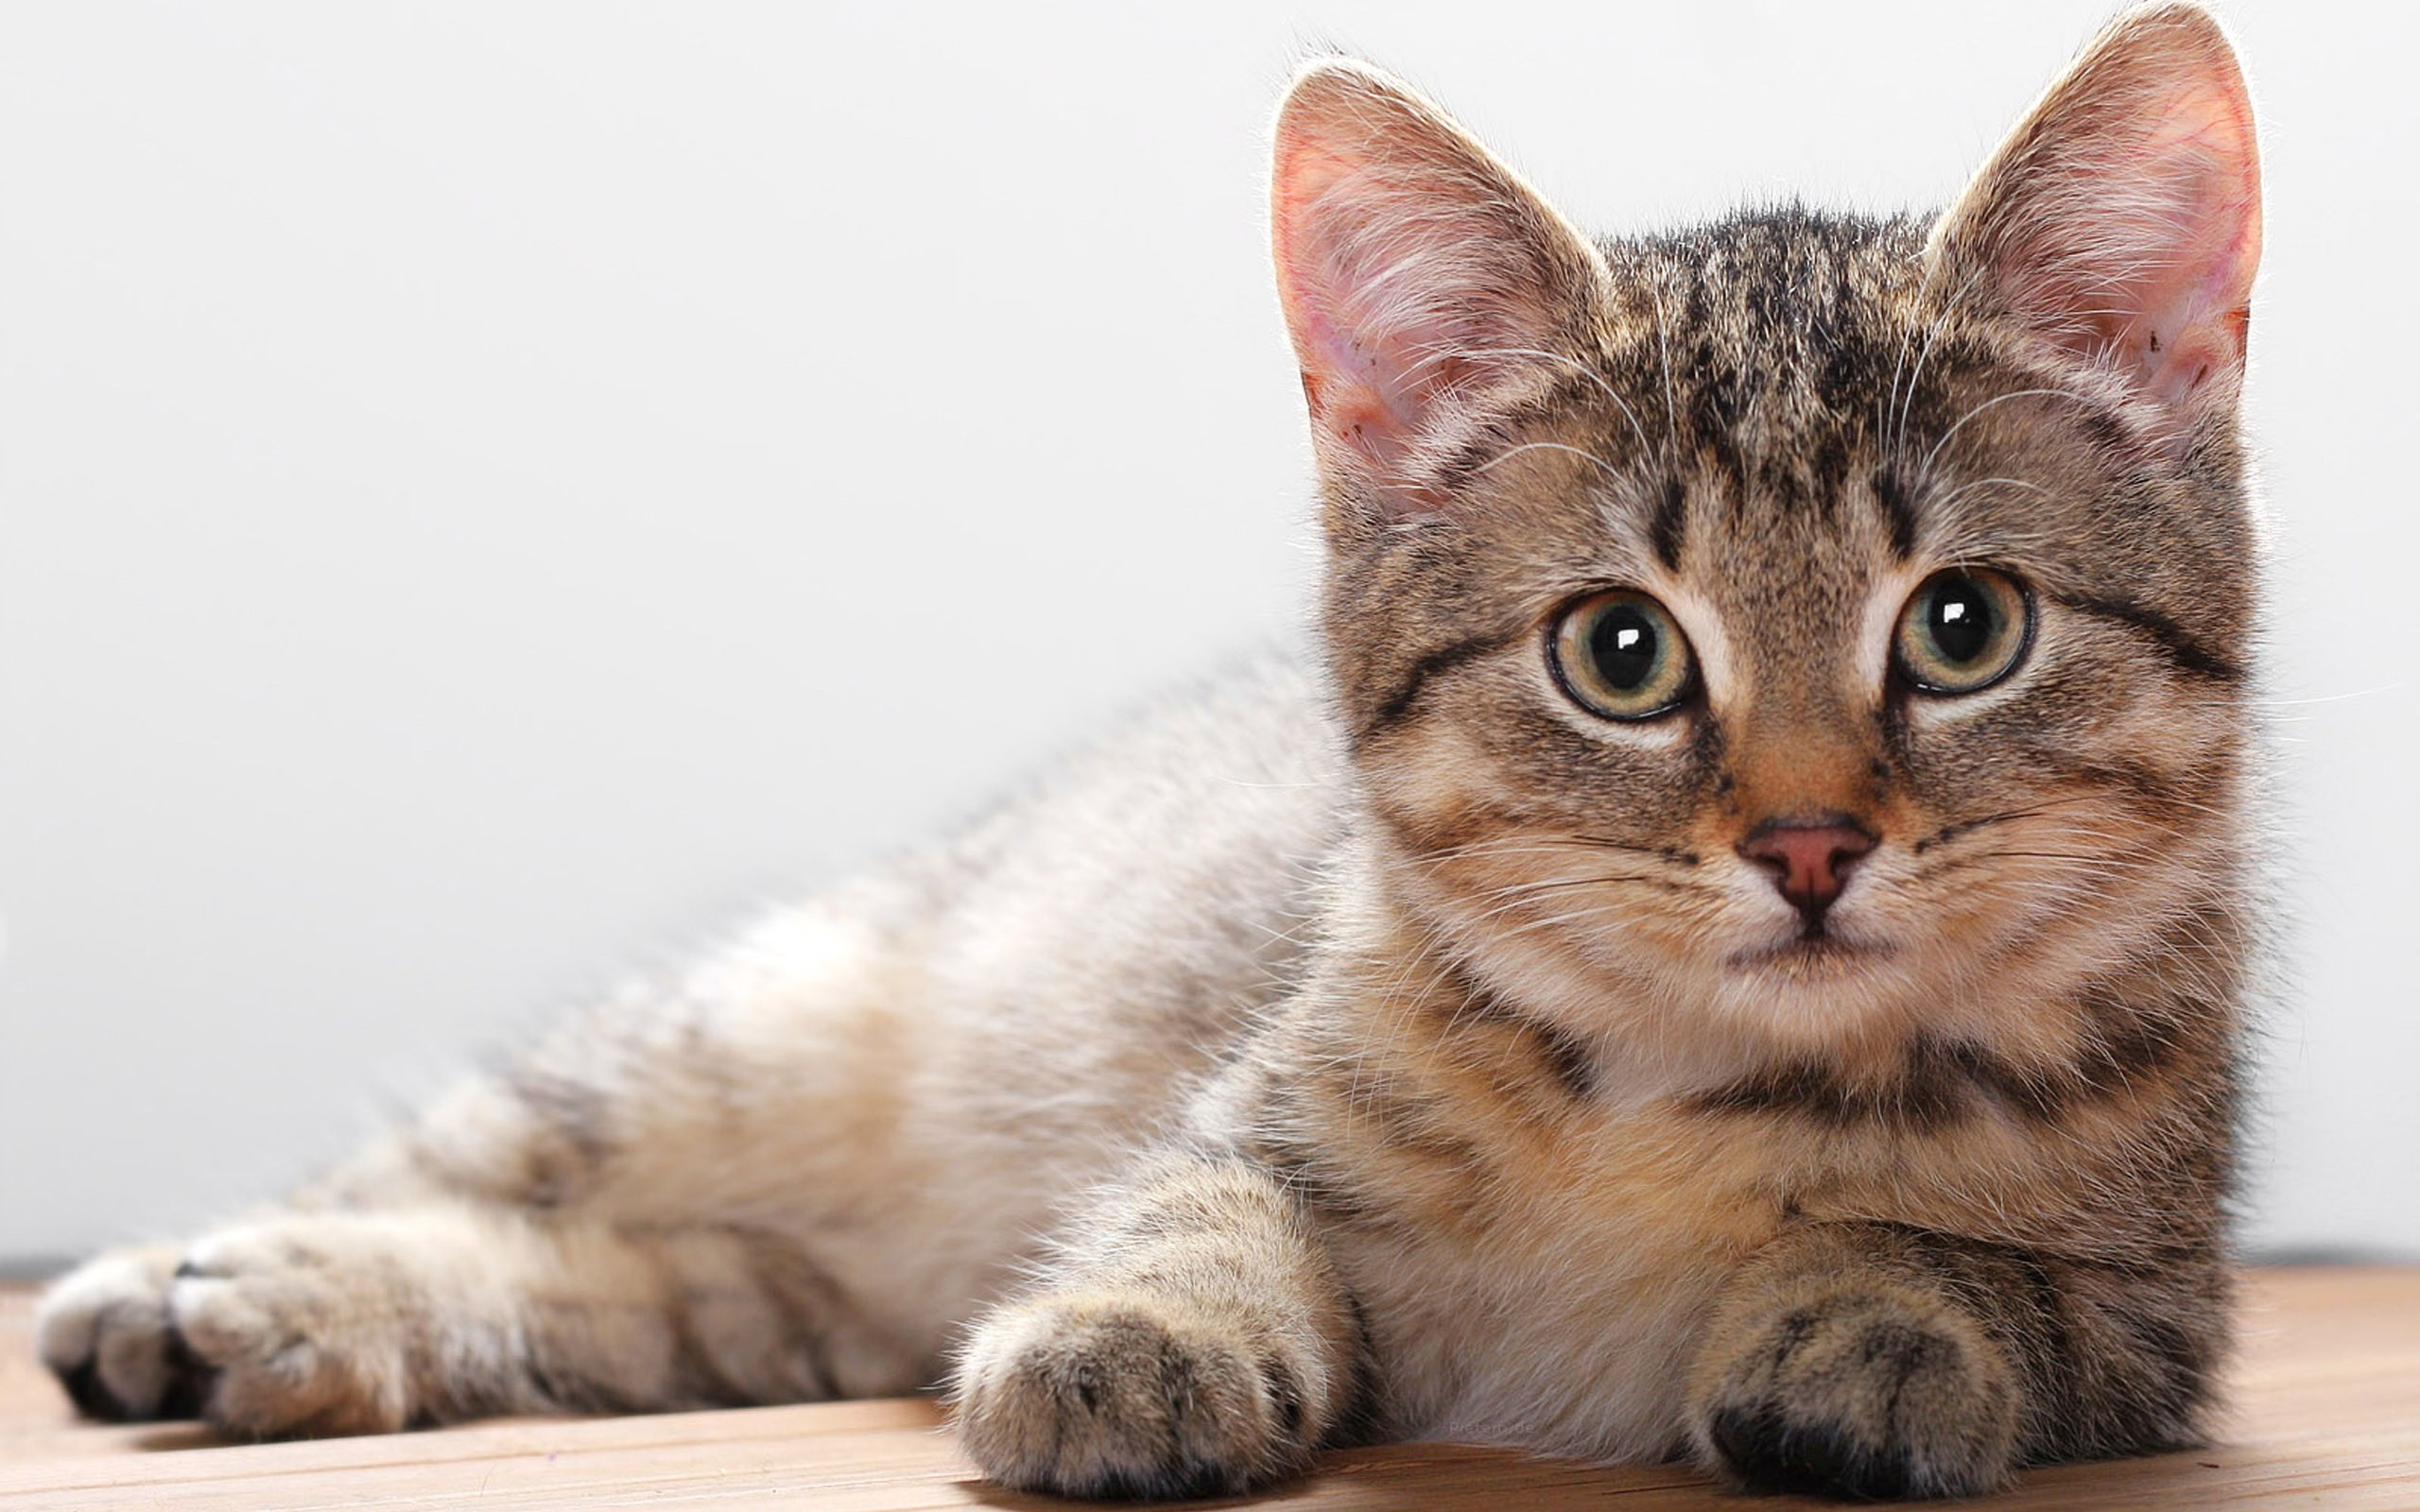

In [36]:
# Importing image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

Image(filename='dataset/single_prediction/cat_or_dog_2.jpg')

In [37]:
# Making prediction
prediction

'cat'

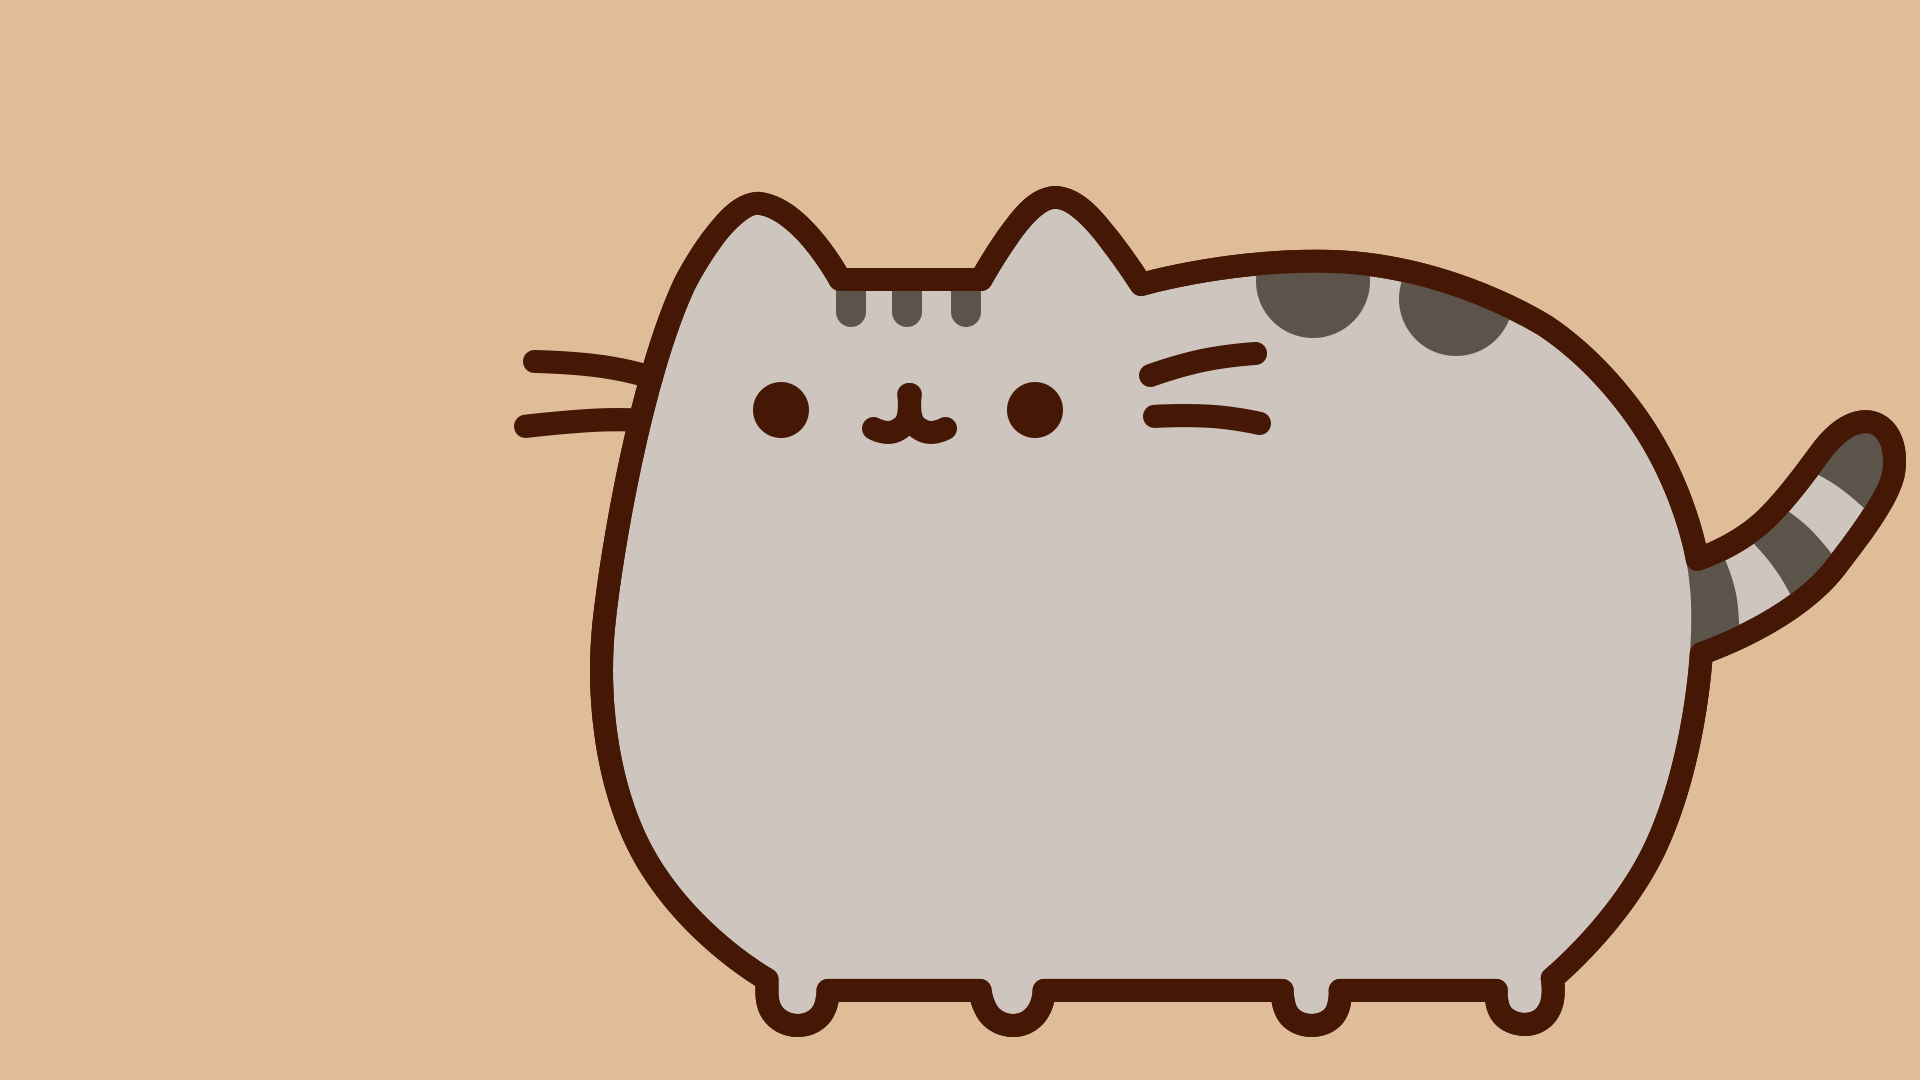

In [39]:
# Importing image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

Image(filename='dataset/single_prediction/cat_or_dog_3.jpg')

In [40]:
# Making prediction
prediction

'cat'

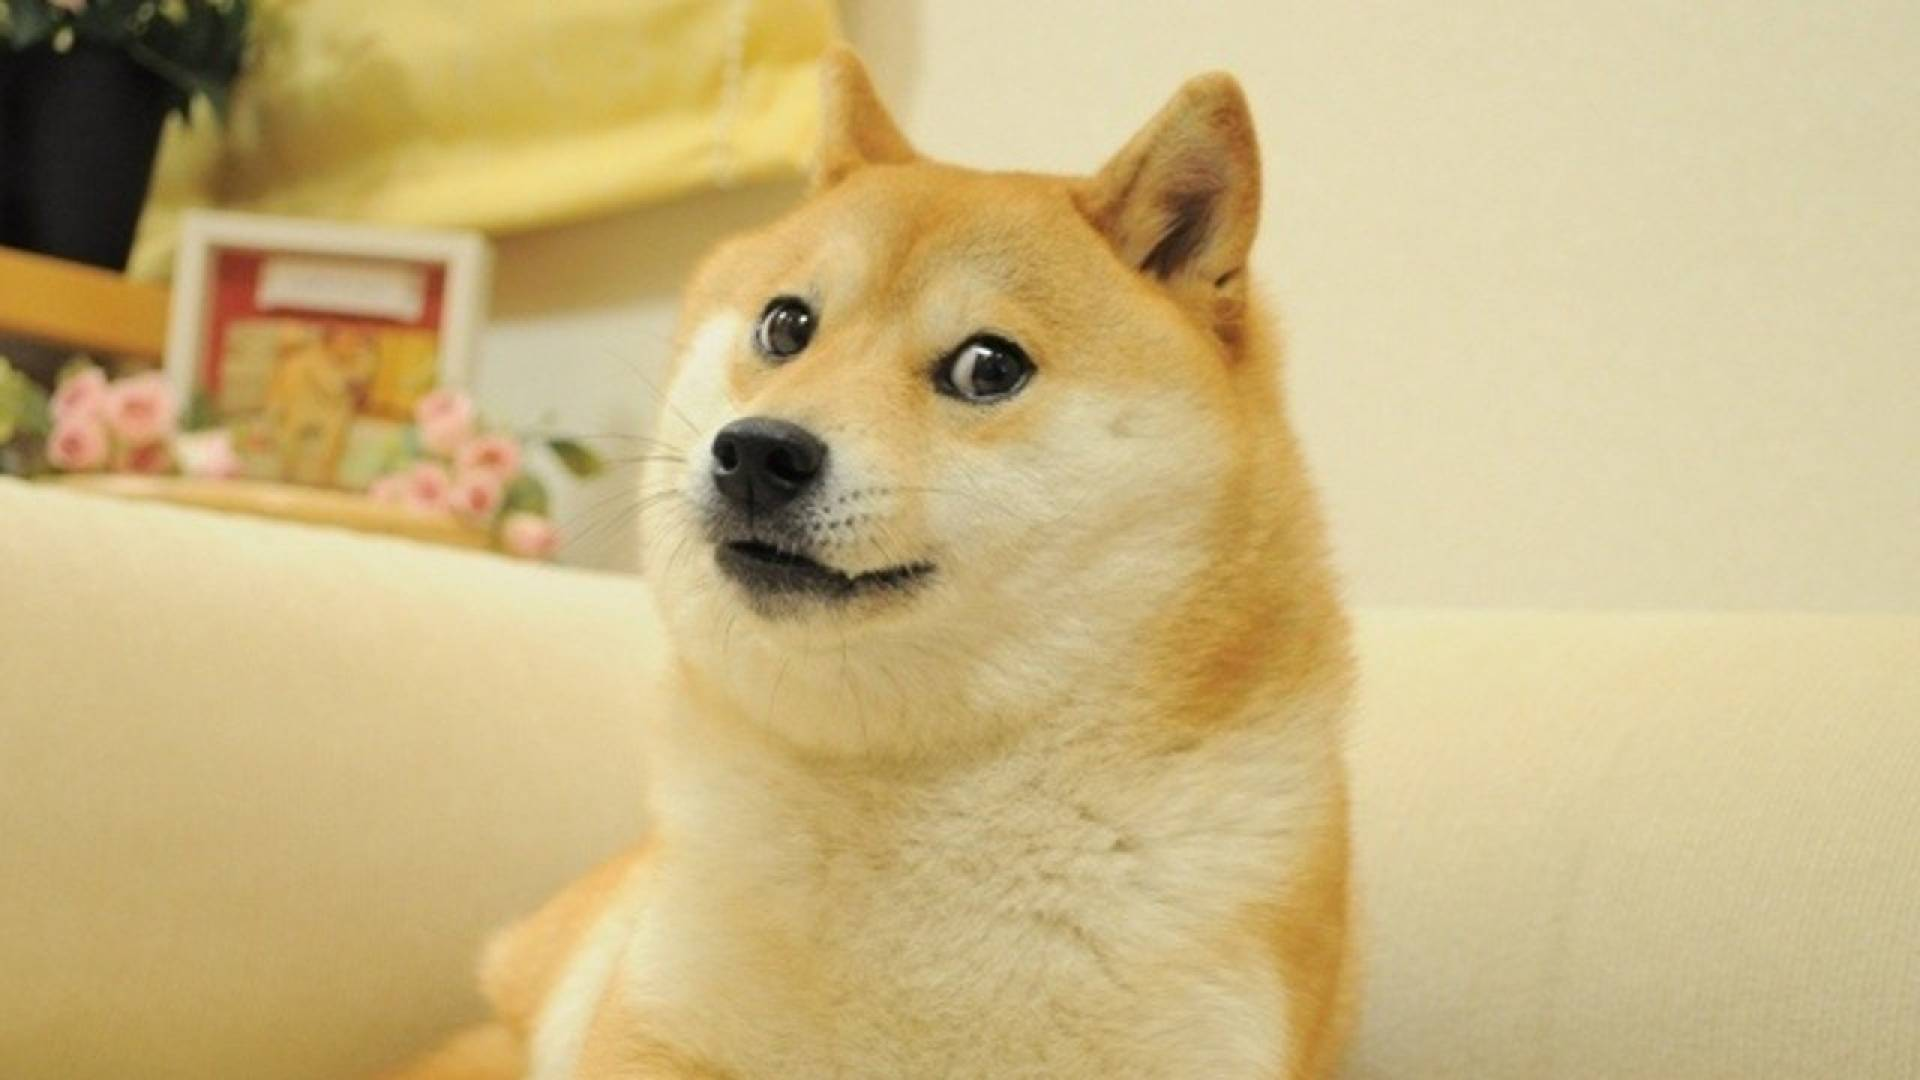

In [41]:
# Importing image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

Image(filename='dataset/single_prediction/cat_or_dog_4.jpg')

In [42]:
# Making prediction
prediction

'dog'

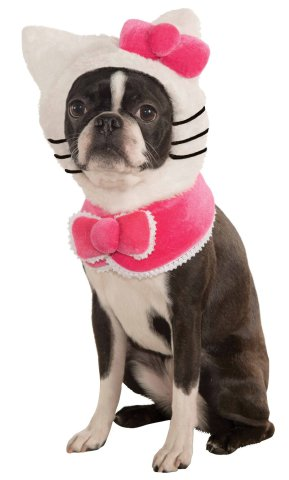

In [43]:
# Importing image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_5.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

Image(filename='dataset/single_prediction/cat_or_dog_5.jpg')

In [44]:
# Making prediction
prediction

'dog'

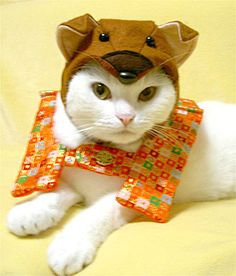

In [45]:
# Importing image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_6.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

Image(filename='dataset/single_prediction/cat_or_dog_6.jpg')

In [46]:
# Making prediction
prediction

'dog'

## Conclusion

We got a final result of 99.67% accuracy for our training set and 81.88% for our test set. For our 6 sample tests, our model got 5/6 correct. (The last 2 photos were difficult becuase the pets were wearing costumes)

Further improvements to this model could be increasing the epochs to 25 for more deep learning. Also, increasing the image resizing from 64x64 to 256x256 should lead to better results due to higher resolution. Finally, increasing the batch size from 32 to 64 could also lead to better results.